In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_excel("dataset_final (1).xlsx")
df.drop("fname",axis=1,inplace=True)
df.head(3)

,serial_no,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,1,33.571474,37.613824,30.087053,37.102539,0.771983,0.746361,0.809737,0.747152,0.341245,...,5075.587782,0.036918,0.030155,0.037329,0.029864,0.192141,0.173651,0.193207,0.172812,0
1,2,18.461546,25.806718,25.655944,26.883562,0.797231,0.627642,0.614348,0.586758,0.081968,...,1678.201018,0.000190,0.000158,0.000198,0.000165,0.013800,0.012556,0.014080,0.012841,0
2,3,17.975612,24.888646,23.639344,23.941351,0.800654,0.667611,0.716540,0.705741,0.094696,...,1324.597589,0.000161,0.000127,0.000132,0.000130,0.012707,0.011277,0.011473,0.011389,0


# **A1**

In [3]:
# Identifying non-numeric columns
x=df.drop("label",axis=1)
y=df["label"]


# K-means clustering with k = 3
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(x)

# K-means clustering with k = 5
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(x)

# Checking inertia or silhouette scores for evaluating the clustering
print("K=3 Inertia:", kmeans3.inertia_)
print("K=5 Inertia:", kmeans5.inertia_)

K=3 Inertia: 20649284951.759777
K=5 Inertia: 13382828007.628775


# **A2**

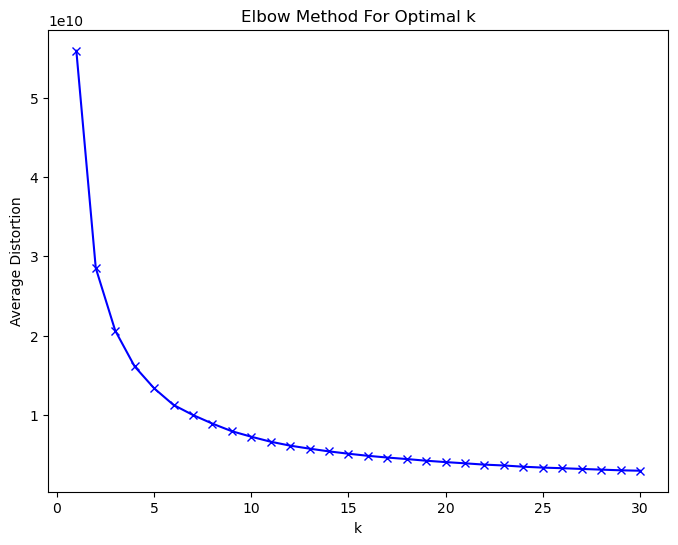

In [4]:
# Determining the ideal k value using the Elbow Method
distortions = []
K = range(1, 31)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

# **A3**

In [ ]:
import scipy.cluster.hierarchy as sch

# Hierarchical clustering using Agglomerative Clustering
plt.figure(figsize=(30, 7))
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# **A4**

In [5]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
# Separating features and target

X = df.drop(columns=['label'])  # Features
y = df['label']  # Target

# Sequential Feature Selector
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=1)
selector.fit(x, y)

# Getting selected features
selected_features = x.columns[selector.support_]


In [6]:
from sklearn.decomposition import PCA

# Performing PCA on scaled data
pca = PCA(n_components=0.95)  # Captures 95% of variance
x_pca = pca.fit_transform(x)

# Getting the no.of components/features needed for 95% variance
num_features_for_95_variance = pca.n_components_

# Printting the no.of components/features needed for 95% variance
print("Number of features needed for 95% variance in PCA:", num_features_for_95_variance)

Number of features needed for 95% variance in PCA: 2


# **A5**

In [7]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# PCA with K components
K = 10  # Update with the desired number of components
pca = PCA(n_components=K)
X_pca = pca.fit_transform(x)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Model (Logistic Regression as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Calculating accuracy using the transformed dataset
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using transformed dataset:", accuracy)

Accuracy using transformed dataset: 1.0
